## Exercici 2
- Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació

In [9]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
#sale un warning que me dice que debo especificar  engine='python' 
#Aparece otro warning UnicodeDecodeError: 'utf-8' donde se deben especificar los caracteres latinos.
df = pd.read_csv('movies.dat', sep='::', engine='python', encoding='latin1', header=None, 
                 names=['Pelicula', 'Genere'])
df

,Pelicula,Genere
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama
3951,Two Family House (2000),Drama


Se observa que el dataframe no tiene cabezero, por lo que se le añade desdel código. 

In [59]:
#Se crea una columna nueva con el año, teniendo en cuenta que está ubicado entre (), y en 4 dígitos
df['Any'] = df['Pelicula'].str.extract(r'\((\d{4})\)')
df.head()

,Pelicula,Genere,Any
1,Toy Story (1995),Animation|Children's|Comedy,1995
2,Jumanji (1995),Adventure|Children's|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama,1995
5,Father of the Bride Part II (1995),Comedy,1995


In [60]:
#Se quitan los años de las peliculas reemplazandolos en una cadena vacía
df['Pelicula'] = df['Pelicula'].str.replace(r'\(\d{4}\)', '', regex=True)
df

,Pelicula,Genere,Any
1,Toy Story,Animation|Children's|Comedy,1995
2,Jumanji,Adventure|Children's|Fantasy,1995
3,Grumpier Old Men,Comedy|Romance,1995
4,Waiting to Exhale,Comedy|Drama,1995
5,Father of the Bride Part II,Comedy,1995
...,...,...,...
3948,Meet the Parents,Comedy,2000
3949,Requiem for a Dream,Drama,2000
3950,Tigerland,Drama,2000
3951,Two Family House,Drama,2000


In [61]:
#En la columna Genere nos quedaremos con el primero que aparece
df['Genere']=df['Genere'].str.extract(r'^([^|]+)')
df

,Pelicula,Genere,Any
1,Toy Story,Animation,1995
2,Jumanji,Adventure,1995
3,Grumpier Old Men,Comedy,1995
4,Waiting to Exhale,Comedy,1995
5,Father of the Bride Part II,Comedy,1995
...,...,...,...
3948,Meet the Parents,Comedy,2000
3949,Requiem for a Dream,Drama,2000
3950,Tigerland,Drama,2000
3951,Two Family House,Drama,2000


In [48]:
#Buscamos saber el número de registros
df.shape

(3883, 3)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pelicula  3883 non-null   object
 1   Genere    3883 non-null   object
 2   Any       3883 non-null   object
dtypes: object(3)
memory usage: 121.3+ KB


- No hay datos nulos, el shape es 3883 = 3883 non-null

In [50]:
#detectar si hay valores duplicados
df.duplicated().sum() 

0

In [64]:
#Se pasa año a numerico para poder luego visualizarlo como variable numérica
df['Any']=df['Any'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pelicula  3883 non-null   object
 1   Genere    3883 non-null   object
 2   Any       3883 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


## Exercici 3

- Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?
- Fes una o dues representacions gràfiques i justifica la teva elecció.

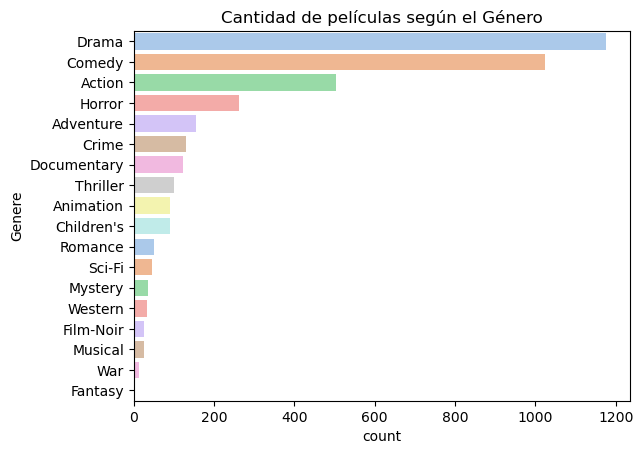

In [125]:
sns.countplot(data=df, y='Genere', palette='pastel', order= df['Genere'].value_counts().index)
plt.title('Cantidad de películas según el Género')
plt.show()

Se utiliza seaborn para crear una gráfica donde se visualiza la variable categórica de género según el número de registros. Se ordena de mayor a menor número de películas. Se observa la cantidad de películas realizadas segun el género, mostrando que la mayoría de películas son de Drama, Comedia o Acción. Mientras que los géneros con menos películas son Musical, War and Fantasy según nuestro dataframe.

In [109]:
#Buscamos todos los géneros de película que tenemos disponibles en el dataframe. 
df['Genere'].unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'], dtype=object)

In [105]:
count_generos=df['Genere'].value_counts().sort_values(ascending=True)
generos50=count_generos[count_generos >= 50].index
df1 = df[df['Genere'].isin(generos50)]
df1

,Pelicula,Genere,Any
1,Toy Story,Animation,1995
2,Jumanji,Adventure,1995
3,Grumpier Old Men,Comedy,1995
4,Waiting to Exhale,Comedy,1995
5,Father of the Bride Part II,Comedy,1995
...,...,...,...
3948,Meet the Parents,Comedy,2000
3949,Requiem for a Dream,Drama,2000
3950,Tigerland,Drama,2000
3951,Two Family House,Drama,2000


Buscamos aquellos géneros de películas que tienen 50 o más películas. Para que luego la visualización no sea tan grande y se puedan observar mejor las diferencias. Para que no haya demasiados colores y se confundan los géneros.

In [106]:
df1['Genere'].value_counts()

Genere
Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Name: count, dtype: int64

Comprobar que se ha realizado correctamente, solo hay géneros con 50 o más películas.

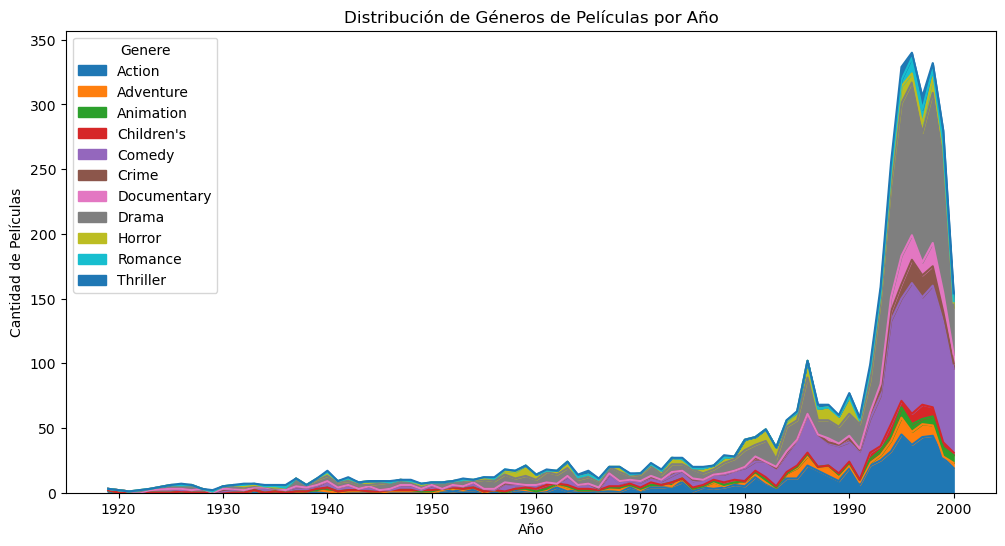

In [123]:
genre_counts = df1.groupby(['Any', 'Genere']).size().unstack(fill_value=0)
genre_counts.plot(kind='area', stacked=True, figsize=(12, 6))


plt.title('Distribución de Géneros de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.show()

Aquí hacemos una visualización con la variable numérica año y la variable categórica género. Realizando un conteo del número de peliculas realizadas, agrupando las películas por año y género.
Se observa el crecimiento de películas por año, así como el género que se realizan según el año. Este gráfico es muy interesante ya que se puede observar como va augmentando la cantidad de películas producidas según se avanza en el tiempo, así como el género. Despuntando en cantidad de películas producidas los géneros de Drama, Comedia y Acción. Los mismos géneros que ya despuntaron en el total del gráfico anterior.